In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, cross_val_predict
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

In [3]:
#EEG
path = "/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/"

data_reeg_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-eeg.csv')
data_reeg_3 = pd.read_csv(path+'3\data_s3_rp-win_-1-0_srate-250_modality-eeg.csv')
data_reeg_4 = pd.read_csv(path+'4\data_s4_rp-win_-1-0_srate-250_modality-eeg.csv')
data_reeg_5 = pd.read_csv(path+'5\data_s5_rp-win_-1-0_srate-250_modality-eeg.csv')
data_reeg_6 = pd.read_csv(path+'6\data_s6_rp-win_-1-0_srate-250_modality-eeg.csv')
data_reeg_7 = pd.read_csv(path+'7\data_s7_rp-win_-1-0_srate-250_modality-eeg.csv')

<font size="4">    <b>EEG Accuracies during first 200ms</b>

In [4]:
data_eeg_1_11 = np.zeros((len(data_reeg_11)//5, data_reeg_11.shape[1]))
data_eeg_1_3 = np.zeros((len(data_reeg_3)//5, data_reeg_3.shape[1]))
data_eeg_1_4 = np.zeros((len(data_reeg_4)//5, data_reeg_4.shape[1]))
data_eeg_1_5 = np.zeros((len(data_reeg_5)//5, data_reeg_5.shape[1]))
data_eeg_1_6 = np.zeros((len(data_reeg_6)//5, data_reeg_6.shape[1]))
data_eeg_1_7 = np.zeros((len(data_reeg_7)//5, data_reeg_7.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_eeg_1_11[50*i:50+50*i, :] = data_reeg_11.iloc[250*i:50+250*i, :]
for i in range(max(data_reeg_3['epoch_ix'])):
    data_eeg_1_3[50*i:50+50*i, :] = data_reeg_3.iloc[250*i:50+250*i, :]
for i in range(max(data_reeg_4['epoch_ix'])):
    data_eeg_1_4[50*i:50+50*i, :] = data_reeg_4.iloc[250*i:50+250*i, :]
for i in range(max(data_reeg_5['epoch_ix'])):
    data_eeg_1_5[50*i:50+50*i, :] = data_reeg_5.iloc[250*i:50+250*i, :]
for i in range(max(data_reeg_6['epoch_ix'])):
    data_eeg_1_6[50*i:50+50*i, :] = data_reeg_6.iloc[250*i:50+250*i, :]
for i in range(max(data_reeg_7['epoch_ix'])):
    data_eeg_1_7[50*i:50+50*i, :] = data_reeg_7.iloc[250*i:50+250*i, :]
    
data_eeg_1_11 = pd.DataFrame(data_eeg_1_11, columns=data_reeg_11.columns)
data_eeg_1_3 = pd.DataFrame(data_eeg_1_3, columns=data_reeg_3.columns)
data_eeg_1_4 = pd.DataFrame(data_eeg_1_4, columns=data_reeg_4.columns)
data_eeg_1_5 = pd.DataFrame(data_eeg_1_5, columns=data_reeg_5.columns)
data_eeg_1_6 = pd.DataFrame(data_eeg_1_6, columns=data_reeg_6.columns)
data_eeg_1_7 = pd.DataFrame(data_eeg_1_7, columns=data_reeg_7.columns)

In [5]:
# EEG Window 
win_eeg = 25
win_eeg_scaled_1_11 = np.arange(len(data_eeg_1_11))//win_eeg
win_eeg_scaled_1_3 = np.arange(len(data_eeg_1_3))//win_eeg
win_eeg_scaled_1_4 = np.arange(len(data_eeg_1_4))//win_eeg
win_eeg_scaled_1_5 = np.arange(len(data_eeg_1_5))//win_eeg
win_eeg_scaled_1_6 = np.arange(len(data_eeg_1_6))//win_eeg
win_eeg_scaled_1_7 = np.arange(len(data_eeg_1_7))//win_eeg

In [6]:
#EEG DataFrames
win_eeg_mean_1_11 = data_eeg_1_11.groupby(win_eeg_scaled_1_11).mean() 
df_eeg_1_11 = win_eeg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_11.columns[3:].tolist())
df_eeg_1_11.reset_index(inplace=True)

win_eeg_mean_1_3 = data_eeg_1_3.groupby(win_eeg_scaled_1_3).mean() 
df_eeg_1_3 = win_eeg_mean_1_3.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_3.columns[3:].tolist())
df_eeg_1_3.reset_index(inplace=True)

win_eeg_mean_1_4 = data_eeg_1_4.groupby(win_eeg_scaled_1_4).mean() 
df_eeg_1_4 = win_eeg_mean_1_4.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_4.columns[3:].tolist())
df_eeg_1_4.reset_index(inplace=True)

win_eeg_mean_1_5 = data_eeg_1_5.groupby(win_eeg_scaled_1_5).mean() 
df_eeg_1_5 = win_eeg_mean_1_5.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_5.columns[3:].tolist())
df_eeg_1_5.reset_index(inplace=True)

win_eeg_mean_1_6 = data_eeg_1_6.groupby(win_eeg_scaled_1_6).mean() 
df_eeg_1_6 = win_eeg_mean_1_6.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_6.columns[3:].tolist())
df_eeg_1_6.reset_index(inplace=True)

win_eeg_mean_1_7 = data_eeg_1_7.groupby(win_eeg_scaled_1_7).mean() 
df_eeg_1_7 = win_eeg_mean_1_7.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_7.columns[3:].tolist())
df_eeg_1_7.reset_index(inplace=True)

In [7]:
# EEG Classifiers

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True)

Xeeg_1_11 = df_eeg_1_11.iloc[:,2:].values
yeeg_1_11 = np.asarray(df_eeg_1_11['rp_class'])
clf_eeg_1_11 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_11.fit(Xeeg_1_11, yeeg_1_11)
pred_y_eeg_1_11 = cross_val_predict(clf_eeg_1_11, Xeeg_1_11, yeeg_1_11, cv=kfolds)
cv_results_11 = cross_val_score(clf_eeg_1_11, Xeeg_1_11, yeeg_1_11, cv=kfolds)
cv_average_1_11 = cv_results_11.mean()
st_deviation_1_11 = cv_results_11.std()
print(cv_average_1_11)
print(st_deviation_1_11)

Xeeg_1_3 = df_eeg_1_3.iloc[:,2:].values
yeeg_1_3 = np.asarray(df_eeg_1_3['rp_class'])
clf_eeg_1_3 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_3.fit(Xeeg_1_3, yeeg_1_3)
pred_y_eeg_1_3 = cross_val_predict(clf_eeg_1_3, Xeeg_1_3, yeeg_1_3, cv=kfolds)
cv_results_3 = cross_val_score(clf_eeg_1_3, Xeeg_1_3, yeeg_1_3, cv=kfolds)
cv_average_1_3 = cv_results_3.mean()
st_deviation_1_3 = cv_results_3.std()
print(cv_average_1_3)
print(st_deviation_1_3)

Xeeg_1_4 = df_eeg_1_4.iloc[:,2:].values
yeeg_1_4 = np.asarray(df_eeg_1_4['rp_class'])
clf_eeg_1_4 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_4.fit(Xeeg_1_4, yeeg_1_4)
pred_y_eeg_1_4 = cross_val_predict(clf_eeg_1_4, Xeeg_1_4, yeeg_1_4, cv=kfolds)
cv_results_4 = cross_val_score(clf_eeg_1_4, Xeeg_1_4, yeeg_1_4, cv=kfolds)
cv_average_1_4 = cv_results_4.mean()
st_deviation_1_4 = cv_results_4.std()
print(cv_average_1_4)
print(st_deviation_1_4)

Xeeg_1_5 = df_eeg_1_5.iloc[:,2:].values
yeeg_1_5 = np.asarray(df_eeg_1_5['rp_class'])
clf_eeg_1_5 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_5.fit(Xeeg_1_5, yeeg_1_5)
pred_y_eeg_1_5 = cross_val_predict(clf_eeg_1_5, Xeeg_1_5, yeeg_1_5, cv=kfolds)
cv_results_5 = cross_val_score(clf_eeg_1_5, Xeeg_1_5, yeeg_1_5, cv=kfolds)
cv_average_1_5 = cv_results_5.mean()
st_deviation_1_5 = cv_results_5.std()
print(cv_average_1_5)
print(st_deviation_1_5)

Xeeg_1_6 = df_eeg_1_6.iloc[:,2:].values
yeeg_1_6 = np.asarray(df_eeg_1_6['rp_class'])
clf_eeg_1_6 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_6.fit(Xeeg_1_6, yeeg_1_6)
pred_y_eeg_1_6 = cross_val_predict(clf_eeg_1_6, Xeeg_1_6, yeeg_1_6, cv=kfolds)
cv_results_6 = cross_val_score(clf_eeg_1_6, Xeeg_1_6, yeeg_1_6, cv=kfolds)
cv_average_1_6 = cv_results_6.mean()
st_deviation_1_6 = cv_results_6.std()
print(cv_average_1_6)
print(st_deviation_1_6)

Xeeg_1_7 = df_eeg_1_7.iloc[:,2:].values
yeeg_1_7 = np.asarray(df_eeg_1_7['rp_class'])
clf_eeg_1_7 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_7.fit(Xeeg_1_7, yeeg_1_7)
pred_y_eeg_1_7 = cross_val_predict(clf_eeg_1_7, Xeeg_1_7, yeeg_1_7, cv=kfolds)
cv_results_7 = cross_val_score(clf_eeg_1_7, Xeeg_1_7, yeeg_1_7, cv=kfolds)
cv_average_1_7 = cv_results_7.mean()
st_deviation_1_7 = cv_results_7.std()
print(cv_average_1_7)
print(st_deviation_1_7)

score_1_eeg = np.zeros((2, 6))
score_1_eeg[0, :] = [cv_average_1_11, cv_average_1_3, cv_average_1_4, cv_average_1_5, cv_average_1_6, cv_average_1_7]
score_1_eeg[1, :] = [st_deviation_1_11, st_deviation_1_3, st_deviation_1_4, st_deviation_1_5, st_deviation_1_6, st_deviation_1_7]

0.5296296296296297
0.0795218909391996
0.5423645320197045
0.07822320413019208
0.5462365591397849
0.038280173971311886
0.49376344086021506
0.08280798679937953
0.45862068965517244
0.07718285960551514
0.48840336134453777
0.0538678403790481


<font size="4">    <b>EEG Accuracies during 200ms-400ms</b>

In [8]:
data_eeg_1_11 = np.zeros((len(data_reeg_11)//5, data_reeg_11.shape[1]))
data_eeg_1_3 = np.zeros((len(data_reeg_3)//5, data_reeg_3.shape[1]))
data_eeg_1_4 = np.zeros((len(data_reeg_4)//5, data_reeg_4.shape[1]))
data_eeg_1_5 = np.zeros((len(data_reeg_5)//5, data_reeg_5.shape[1]))
data_eeg_1_6 = np.zeros((len(data_reeg_6)//5, data_reeg_6.shape[1]))
data_eeg_1_7 = np.zeros((len(data_reeg_7)//5, data_reeg_7.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_eeg_1_11[50*i:50+50*i, :] = data_reeg_11.iloc[50+(250*i):100+250*i, :]
for i in range(max(data_reeg_3['epoch_ix'])):
    data_eeg_1_3[50*i:50+50*i, :] = data_reeg_3.iloc[50+(250*i):100+250*i, :]
for i in range(max(data_reeg_4['epoch_ix'])):
    data_eeg_1_4[50*i:50+50*i, :] = data_reeg_4.iloc[50+(250*i):100+250*i, :]
for i in range(max(data_reeg_5['epoch_ix'])):
    data_eeg_1_5[50*i:50+50*i, :] = data_reeg_5.iloc[50+(250*i):100+250*i, :]
for i in range(max(data_reeg_6['epoch_ix'])):
    data_eeg_1_6[50*i:50+50*i, :] = data_reeg_6.iloc[50+(250*i):100+250*i, :]
for i in range(max(data_reeg_7['epoch_ix'])):
    data_eeg_1_7[50*i:50+50*i, :] = data_reeg_7.iloc[50+(250*i):100+250*i, :]
    
data_eeg_1_11 = pd.DataFrame(data_eeg_1_11, columns=data_reeg_11.columns)
data_eeg_1_3 = pd.DataFrame(data_eeg_1_3, columns=data_reeg_3.columns)
data_eeg_1_4 = pd.DataFrame(data_eeg_1_4, columns=data_reeg_4.columns)
data_eeg_1_5 = pd.DataFrame(data_eeg_1_5, columns=data_reeg_5.columns)
data_eeg_1_6 = pd.DataFrame(data_eeg_1_6, columns=data_reeg_6.columns)
data_eeg_1_7 = pd.DataFrame(data_eeg_1_7, columns=data_reeg_7.columns)

# EEG Window 
win_eeg = 25
win_eeg_scaled_1_11 = np.arange(len(data_eeg_1_11))//win_eeg
win_eeg_scaled_1_3 = np.arange(len(data_eeg_1_3))//win_eeg
win_eeg_scaled_1_4 = np.arange(len(data_eeg_1_4))//win_eeg
win_eeg_scaled_1_5 = np.arange(len(data_eeg_1_5))//win_eeg
win_eeg_scaled_1_6 = np.arange(len(data_eeg_1_6))//win_eeg
win_eeg_scaled_1_7 = np.arange(len(data_eeg_1_7))//win_eeg

#EEG DataFrames
win_eeg_mean_1_11 = data_eeg_1_11.groupby(win_eeg_scaled_1_11).mean() 
df_eeg_1_11 = win_eeg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_11.columns[3:].tolist())
df_eeg_1_11.reset_index(inplace=True)

win_eeg_mean_1_3 = data_eeg_1_3.groupby(win_eeg_scaled_1_3).mean() 
df_eeg_1_3 = win_eeg_mean_1_3.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_3.columns[3:].tolist())
df_eeg_1_3.reset_index(inplace=True)

win_eeg_mean_1_4 = data_eeg_1_4.groupby(win_eeg_scaled_1_4).mean() 
df_eeg_1_4 = win_eeg_mean_1_4.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_4.columns[3:].tolist())
df_eeg_1_4.reset_index(inplace=True)

win_eeg_mean_1_5 = data_eeg_1_5.groupby(win_eeg_scaled_1_5).mean() 
df_eeg_1_5 = win_eeg_mean_1_5.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_5.columns[3:].tolist())
df_eeg_1_5.reset_index(inplace=True)

win_eeg_mean_1_6 = data_eeg_1_6.groupby(win_eeg_scaled_1_6).mean() 
df_eeg_1_6 = win_eeg_mean_1_6.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_6.columns[3:].tolist())
df_eeg_1_6.reset_index(inplace=True)

win_eeg_mean_1_7 = data_eeg_1_7.groupby(win_eeg_scaled_1_7).mean() 
df_eeg_1_7 = win_eeg_mean_1_7.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_7.columns[3:].tolist())
df_eeg_1_7.reset_index(inplace=True)

# EEG Classifiers

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True)

Xeeg_1_11 = df_eeg_1_11.iloc[:,2:].values
yeeg_1_11 = np.asarray(df_eeg_1_11['rp_class'])
clf_eeg_1_11 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_11.fit(Xeeg_1_11, yeeg_1_11)
pred_y_eeg_1_11 = cross_val_predict(clf_eeg_1_11, Xeeg_1_11, yeeg_1_11, cv=kfolds)
cv_results_11 = cross_val_score(clf_eeg_1_11, Xeeg_1_11, yeeg_1_11, cv=kfolds)
cv_average_1_11 = cv_results_11.mean()
st_deviation_1_11 = cv_results_11.std()
print(cv_average_1_11)
print(st_deviation_1_11)

Xeeg_1_3 = df_eeg_1_3.iloc[:,2:].values
yeeg_1_3 = np.asarray(df_eeg_1_3['rp_class'])
clf_eeg_1_3 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_3.fit(Xeeg_1_3, yeeg_1_3)
pred_y_eeg_1_3 = cross_val_predict(clf_eeg_1_3, Xeeg_1_3, yeeg_1_3, cv=kfolds)
cv_results_3 = cross_val_score(clf_eeg_1_3, Xeeg_1_3, yeeg_1_3, cv=kfolds)
cv_average_1_3 = cv_results_3.mean()
st_deviation_1_3 = cv_results_3.std()
print(cv_average_1_3)
print(st_deviation_1_3)

Xeeg_1_4 = df_eeg_1_4.iloc[:,2:].values
yeeg_1_4 = np.asarray(df_eeg_1_4['rp_class'])
clf_eeg_1_4 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_4.fit(Xeeg_1_4, yeeg_1_4)
pred_y_eeg_1_4 = cross_val_predict(clf_eeg_1_4, Xeeg_1_4, yeeg_1_4, cv=kfolds)
cv_results_4 = cross_val_score(clf_eeg_1_4, Xeeg_1_4, yeeg_1_4, cv=kfolds)
cv_average_1_4 = cv_results_4.mean()
st_deviation_1_4 = cv_results_4.std()
print(cv_average_1_4)
print(st_deviation_1_4)

Xeeg_1_5 = df_eeg_1_5.iloc[:,2:].values
yeeg_1_5 = np.asarray(df_eeg_1_5['rp_class'])
clf_eeg_1_5 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_5.fit(Xeeg_1_5, yeeg_1_5)
pred_y_eeg_1_5 = cross_val_predict(clf_eeg_1_5, Xeeg_1_5, yeeg_1_5, cv=kfolds)
cv_results_5 = cross_val_score(clf_eeg_1_5, Xeeg_1_5, yeeg_1_5, cv=kfolds)
cv_average_1_5 = cv_results_5.mean()
st_deviation_1_5 = cv_results_5.std()
print(cv_average_1_5)
print(st_deviation_1_5)

Xeeg_1_6 = df_eeg_1_6.iloc[:,2:].values
yeeg_1_6 = np.asarray(df_eeg_1_6['rp_class'])
clf_eeg_1_6 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_6.fit(Xeeg_1_6, yeeg_1_6)
pred_y_eeg_1_6 = cross_val_predict(clf_eeg_1_6, Xeeg_1_6, yeeg_1_6, cv=kfolds)
cv_results_6 = cross_val_score(clf_eeg_1_6, Xeeg_1_6, yeeg_1_6, cv=kfolds)
cv_average_1_6 = cv_results_6.mean()
st_deviation_1_6 = cv_results_6.std()
print(cv_average_1_6)
print(st_deviation_1_6)

Xeeg_1_7 = df_eeg_1_7.iloc[:,2:].values
yeeg_1_7 = np.asarray(df_eeg_1_7['rp_class'])
clf_eeg_1_7 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_7.fit(Xeeg_1_7, yeeg_1_7)
pred_y_eeg_1_7 = cross_val_predict(clf_eeg_1_7, Xeeg_1_7, yeeg_1_7, cv=kfolds)
cv_results_7 = cross_val_score(clf_eeg_1_7, Xeeg_1_7, yeeg_1_7, cv=kfolds)
cv_average_1_7 = cv_results_7.mean()
st_deviation_1_7 = cv_results_7.std()
print(cv_average_1_7)
print(st_deviation_1_7)

score_2_eeg = np.zeros((2, 6))
score_2_eeg[0, :] = [cv_average_1_11, cv_average_1_3, cv_average_1_4, cv_average_1_5, cv_average_1_6, cv_average_1_7]
score_2_eeg[1, :] = [st_deviation_1_11, st_deviation_1_3, st_deviation_1_4, st_deviation_1_5, st_deviation_1_6, st_deviation_1_7]

0.47407407407407404
0.06583847716530065
0.5386699507389162
0.12025179444328496
0.6216129032258063
0.08497678775502565
0.5387096774193548
0.09547515217386283
0.5448275862068965
0.07033130363576254
0.5253781512605042
0.06433792574098057


<font size="4">    <b>EEG Accuracies during 400ms-600ms</b>

In [9]:
data_eeg_1_11 = np.zeros((len(data_reeg_11)//5, data_reeg_11.shape[1]))
data_eeg_1_3 = np.zeros((len(data_reeg_3)//5, data_reeg_3.shape[1]))
data_eeg_1_4 = np.zeros((len(data_reeg_4)//5, data_reeg_4.shape[1]))
data_eeg_1_5 = np.zeros((len(data_reeg_5)//5, data_reeg_5.shape[1]))
data_eeg_1_6 = np.zeros((len(data_reeg_6)//5, data_reeg_6.shape[1]))
data_eeg_1_7 = np.zeros((len(data_reeg_7)//5, data_reeg_7.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_eeg_1_11[50*i:50+50*i, :] = data_reeg_11.iloc[100+(250*i):150+250*i, :]
for i in range(max(data_reeg_3['epoch_ix'])):
    data_eeg_1_3[50*i:50+50*i, :] = data_reeg_3.iloc[100+(250*i):150+250*i, :]
for i in range(max(data_reeg_4['epoch_ix'])):
    data_eeg_1_4[50*i:50+50*i, :] = data_reeg_4.iloc[100+(250*i):150+250*i, :]
for i in range(max(data_reeg_5['epoch_ix'])):
    data_eeg_1_5[50*i:50+50*i, :] = data_reeg_5.iloc[100+(250*i):150+250*i, :]
for i in range(max(data_reeg_6['epoch_ix'])):
    data_eeg_1_6[50*i:50+50*i, :] = data_reeg_6.iloc[100+(250*i):150+250*i, :]
for i in range(max(data_reeg_7['epoch_ix'])):
    data_eeg_1_7[50*i:50+50*i, :] = data_reeg_7.iloc[100+(250*i):150+250*i, :]
    
data_eeg_1_11 = pd.DataFrame(data_eeg_1_11, columns=data_reeg_11.columns)
data_eeg_1_3 = pd.DataFrame(data_eeg_1_3, columns=data_reeg_3.columns)
data_eeg_1_4 = pd.DataFrame(data_eeg_1_4, columns=data_reeg_4.columns)
data_eeg_1_5 = pd.DataFrame(data_eeg_1_5, columns=data_reeg_5.columns)
data_eeg_1_6 = pd.DataFrame(data_eeg_1_6, columns=data_reeg_6.columns)
data_eeg_1_7 = pd.DataFrame(data_eeg_1_7, columns=data_reeg_7.columns)

# EEG Window 
win_eeg = 25
win_eeg_scaled_1_11 = np.arange(len(data_eeg_1_11))//win_eeg
win_eeg_scaled_1_3 = np.arange(len(data_eeg_1_3))//win_eeg
win_eeg_scaled_1_4 = np.arange(len(data_eeg_1_4))//win_eeg
win_eeg_scaled_1_5 = np.arange(len(data_eeg_1_5))//win_eeg
win_eeg_scaled_1_6 = np.arange(len(data_eeg_1_6))//win_eeg
win_eeg_scaled_1_7 = np.arange(len(data_eeg_1_7))//win_eeg

#EEG DataFrames
win_eeg_mean_1_11 = data_eeg_1_11.groupby(win_eeg_scaled_1_11).mean() 
df_eeg_1_11 = win_eeg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_11.columns[3:].tolist())
df_eeg_1_11.reset_index(inplace=True)

win_eeg_mean_1_3 = data_eeg_1_3.groupby(win_eeg_scaled_1_3).mean() 
df_eeg_1_3 = win_eeg_mean_1_3.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_3.columns[3:].tolist())
df_eeg_1_3.reset_index(inplace=True)

win_eeg_mean_1_4 = data_eeg_1_4.groupby(win_eeg_scaled_1_4).mean() 
df_eeg_1_4 = win_eeg_mean_1_4.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_4.columns[3:].tolist())
df_eeg_1_4.reset_index(inplace=True)

win_eeg_mean_1_5 = data_eeg_1_5.groupby(win_eeg_scaled_1_5).mean() 
df_eeg_1_5 = win_eeg_mean_1_5.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_5.columns[3:].tolist())
df_eeg_1_5.reset_index(inplace=True)

win_eeg_mean_1_6 = data_eeg_1_6.groupby(win_eeg_scaled_1_6).mean() 
df_eeg_1_6 = win_eeg_mean_1_6.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_6.columns[3:].tolist())
df_eeg_1_6.reset_index(inplace=True)

win_eeg_mean_1_7 = data_eeg_1_7.groupby(win_eeg_scaled_1_7).mean() 
df_eeg_1_7 = win_eeg_mean_1_7.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_7.columns[3:].tolist())
df_eeg_1_7.reset_index(inplace=True)

# EEG Classifiers

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True)

Xeeg_1_11 = df_eeg_1_11.iloc[:,2:].values
yeeg_1_11 = np.asarray(df_eeg_1_11['rp_class'])
clf_eeg_1_11 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_11.fit(Xeeg_1_11, yeeg_1_11)
pred_y_eeg_1_11 = cross_val_predict(clf_eeg_1_11, Xeeg_1_11, yeeg_1_11, cv=kfolds)
cv_results_11 = cross_val_score(clf_eeg_1_11, Xeeg_1_11, yeeg_1_11, cv=kfolds)
cv_average_1_11 = cv_results_11.mean()
st_deviation_1_11 = cv_results_11.std()
print(cv_average_1_11)
print(st_deviation_1_11)

Xeeg_1_3 = df_eeg_1_3.iloc[:,2:].values
yeeg_1_3 = np.asarray(df_eeg_1_3['rp_class'])
clf_eeg_1_3 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_3.fit(Xeeg_1_3, yeeg_1_3)
pred_y_eeg_1_3 = cross_val_predict(clf_eeg_1_3, Xeeg_1_3, yeeg_1_3, cv=kfolds)
cv_results_3 = cross_val_score(clf_eeg_1_3, Xeeg_1_3, yeeg_1_3, cv=kfolds)
cv_average_1_3 = cv_results_3.mean()
st_deviation_1_3 = cv_results_3.std()
print(cv_average_1_3)
print(st_deviation_1_3)

Xeeg_1_4 = df_eeg_1_4.iloc[:,2:].values
yeeg_1_4 = np.asarray(df_eeg_1_4['rp_class'])
clf_eeg_1_4 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_4.fit(Xeeg_1_4, yeeg_1_4)
pred_y_eeg_1_4 = cross_val_predict(clf_eeg_1_4, Xeeg_1_4, yeeg_1_4, cv=kfolds)
cv_results_4 = cross_val_score(clf_eeg_1_4, Xeeg_1_4, yeeg_1_4, cv=kfolds)
cv_average_1_4 = cv_results_4.mean()
st_deviation_1_4 = cv_results_4.std()
print(cv_average_1_4)
print(st_deviation_1_4)

Xeeg_1_5 = df_eeg_1_5.iloc[:,2:].values
yeeg_1_5 = np.asarray(df_eeg_1_5['rp_class'])
clf_eeg_1_5 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_5.fit(Xeeg_1_5, yeeg_1_5)
pred_y_eeg_1_5 = cross_val_predict(clf_eeg_1_5, Xeeg_1_5, yeeg_1_5, cv=kfolds)
cv_results_5 = cross_val_score(clf_eeg_1_5, Xeeg_1_5, yeeg_1_5, cv=kfolds)
cv_average_1_5 = cv_results_5.mean()
st_deviation_1_5 = cv_results_5.std()
print(cv_average_1_5)
print(st_deviation_1_5)

Xeeg_1_6 = df_eeg_1_6.iloc[:,2:].values
yeeg_1_6 = np.asarray(df_eeg_1_6['rp_class'])
clf_eeg_1_6 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_6.fit(Xeeg_1_6, yeeg_1_6)
pred_y_eeg_1_6 = cross_val_predict(clf_eeg_1_6, Xeeg_1_6, yeeg_1_6, cv=kfolds)
cv_results_6 = cross_val_score(clf_eeg_1_6, Xeeg_1_6, yeeg_1_6, cv=kfolds)
cv_average_1_6 = cv_results_6.mean()
st_deviation_1_6 = cv_results_6.std()
print(cv_average_1_6)
print(st_deviation_1_6)

Xeeg_1_7 = df_eeg_1_7.iloc[:,2:].values
yeeg_1_7 = np.asarray(df_eeg_1_7['rp_class'])
clf_eeg_1_7 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_7.fit(Xeeg_1_7, yeeg_1_7)
pred_y_eeg_1_7 = cross_val_predict(clf_eeg_1_7, Xeeg_1_7, yeeg_1_7, cv=kfolds)
cv_results_7 = cross_val_score(clf_eeg_1_7, Xeeg_1_7, yeeg_1_7, cv=kfolds)
cv_average_1_7 = cv_results_7.mean()
st_deviation_1_7 = cv_results_7.std()
print(cv_average_1_7)
print(st_deviation_1_7)

score_3_eeg = np.zeros((2, 6))
score_3_eeg[0, :] = [cv_average_1_11, cv_average_1_3, cv_average_1_4, cv_average_1_5, cv_average_1_6, cv_average_1_7]
score_3_eeg[1, :] = [st_deviation_1_11, st_deviation_1_3, st_deviation_1_4, st_deviation_1_5, st_deviation_1_6, st_deviation_1_7]

0.5185185185185184
0.09072184232530289
0.5836206896551726
0.10579448532320972
0.6646236559139784
0.07353368714318792
0.5775268817204301
0.0919822555992546
0.6103448275862069
0.05126230602523623
0.6488235294117647
0.07978543537541126


<font size="4">    <b>EEG Accuracies during 600ms-800ms</b>

In [10]:
data_eeg_1_11 = np.zeros((len(data_reeg_11)//5, data_reeg_11.shape[1]))
data_eeg_1_3 = np.zeros((len(data_reeg_3)//5, data_reeg_3.shape[1]))
data_eeg_1_4 = np.zeros((len(data_reeg_4)//5, data_reeg_4.shape[1]))
data_eeg_1_5 = np.zeros((len(data_reeg_5)//5, data_reeg_5.shape[1]))
data_eeg_1_6 = np.zeros((len(data_reeg_6)//5, data_reeg_6.shape[1]))
data_eeg_1_7 = np.zeros((len(data_reeg_7)//5, data_reeg_7.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_eeg_1_11[50*i:50+50*i, :] = data_reeg_11.iloc[150+(250*i):200+250*i, :]
for i in range(max(data_reeg_3['epoch_ix'])):
    data_eeg_1_3[50*i:50+50*i, :] = data_reeg_3.iloc[150+(250*i):200+250*i, :]
for i in range(max(data_reeg_4['epoch_ix'])):
    data_eeg_1_4[50*i:50+50*i, :] = data_reeg_4.iloc[150+(250*i):200+250*i, :]
for i in range(max(data_reeg_5['epoch_ix'])):
    data_eeg_1_5[50*i:50+50*i, :] = data_reeg_5.iloc[150+(250*i):200+250*i, :]
for i in range(max(data_reeg_6['epoch_ix'])):
    data_eeg_1_6[50*i:50+50*i, :] = data_reeg_6.iloc[150+(250*i):200+250*i, :]
for i in range(max(data_reeg_7['epoch_ix'])):
    data_eeg_1_7[50*i:50+50*i, :] = data_reeg_7.iloc[150+(250*i):200+250*i, :]
    
data_eeg_1_11 = pd.DataFrame(data_eeg_1_11, columns=data_reeg_11.columns)
data_eeg_1_3 = pd.DataFrame(data_eeg_1_3, columns=data_reeg_3.columns)
data_eeg_1_4 = pd.DataFrame(data_eeg_1_4, columns=data_reeg_4.columns)
data_eeg_1_5 = pd.DataFrame(data_eeg_1_5, columns=data_reeg_5.columns)
data_eeg_1_6 = pd.DataFrame(data_eeg_1_6, columns=data_reeg_6.columns)
data_eeg_1_7 = pd.DataFrame(data_eeg_1_7, columns=data_reeg_7.columns)

# EEG Window 
win_eeg = 25
win_eeg_scaled_1_11 = np.arange(len(data_eeg_1_11))//win_eeg
win_eeg_scaled_1_3 = np.arange(len(data_eeg_1_3))//win_eeg
win_eeg_scaled_1_4 = np.arange(len(data_eeg_1_4))//win_eeg
win_eeg_scaled_1_5 = np.arange(len(data_eeg_1_5))//win_eeg
win_eeg_scaled_1_6 = np.arange(len(data_eeg_1_6))//win_eeg
win_eeg_scaled_1_7 = np.arange(len(data_eeg_1_7))//win_eeg

#EEG DataFrames
win_eeg_mean_1_11 = data_eeg_1_11.groupby(win_eeg_scaled_1_11).mean() 
df_eeg_1_11 = win_eeg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_11.columns[3:].tolist())
df_eeg_1_11.reset_index(inplace=True)

win_eeg_mean_1_3 = data_eeg_1_3.groupby(win_eeg_scaled_1_3).mean() 
df_eeg_1_3 = win_eeg_mean_1_3.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_3.columns[3:].tolist())
df_eeg_1_3.reset_index(inplace=True)

win_eeg_mean_1_4 = data_eeg_1_4.groupby(win_eeg_scaled_1_4).mean() 
df_eeg_1_4 = win_eeg_mean_1_4.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_4.columns[3:].tolist())
df_eeg_1_4.reset_index(inplace=True)

win_eeg_mean_1_5 = data_eeg_1_5.groupby(win_eeg_scaled_1_5).mean() 
df_eeg_1_5 = win_eeg_mean_1_5.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_5.columns[3:].tolist())
df_eeg_1_5.reset_index(inplace=True)

win_eeg_mean_1_6 = data_eeg_1_6.groupby(win_eeg_scaled_1_6).mean() 
df_eeg_1_6 = win_eeg_mean_1_6.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_6.columns[3:].tolist())
df_eeg_1_6.reset_index(inplace=True)

win_eeg_mean_1_7 = data_eeg_1_7.groupby(win_eeg_scaled_1_7).mean() 
df_eeg_1_7 = win_eeg_mean_1_7.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_7.columns[3:].tolist())
df_eeg_1_7.reset_index(inplace=True)

# EEG Classifiers

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True)

Xeeg_1_11 = df_eeg_1_11.iloc[:,2:].values
yeeg_1_11 = np.asarray(df_eeg_1_11['rp_class'])
clf_eeg_1_11 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_11.fit(Xeeg_1_11, yeeg_1_11)
pred_y_eeg_1_11 = cross_val_predict(clf_eeg_1_11, Xeeg_1_11, yeeg_1_11, cv=kfolds)
cv_results_11 = cross_val_score(clf_eeg_1_11, Xeeg_1_11, yeeg_1_11, cv=kfolds)
cv_average_1_11 = cv_results_11.mean()
st_deviation_1_11 = cv_results_11.std()
print(cv_average_1_11)
print(st_deviation_1_11)

Xeeg_1_3 = df_eeg_1_3.iloc[:,2:].values
yeeg_1_3 = np.asarray(df_eeg_1_3['rp_class'])
clf_eeg_1_3 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_3.fit(Xeeg_1_3, yeeg_1_3)
pred_y_eeg_1_3 = cross_val_predict(clf_eeg_1_3, Xeeg_1_3, yeeg_1_3, cv=kfolds)
cv_results_3 = cross_val_score(clf_eeg_1_3, Xeeg_1_3, yeeg_1_3, cv=kfolds)
cv_average_1_3 = cv_results_3.mean()
st_deviation_1_3 = cv_results_3.std()
print(cv_average_1_3)
print(st_deviation_1_3)

Xeeg_1_4 = df_eeg_1_4.iloc[:,2:].values
yeeg_1_4 = np.asarray(df_eeg_1_4['rp_class'])
clf_eeg_1_4 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_4.fit(Xeeg_1_4, yeeg_1_4)
pred_y_eeg_1_4 = cross_val_predict(clf_eeg_1_4, Xeeg_1_4, yeeg_1_4, cv=kfolds)
cv_results_4 = cross_val_score(clf_eeg_1_4, Xeeg_1_4, yeeg_1_4, cv=kfolds)
cv_average_1_4 = cv_results_4.mean()
st_deviation_1_4 = cv_results_4.std()
print(cv_average_1_4)
print(st_deviation_1_4)

Xeeg_1_5 = df_eeg_1_5.iloc[:,2:].values
yeeg_1_5 = np.asarray(df_eeg_1_5['rp_class'])
clf_eeg_1_5 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_5.fit(Xeeg_1_5, yeeg_1_5)
pred_y_eeg_1_5 = cross_val_predict(clf_eeg_1_5, Xeeg_1_5, yeeg_1_5, cv=kfolds)
cv_results_5 = cross_val_score(clf_eeg_1_5, Xeeg_1_5, yeeg_1_5, cv=kfolds)
cv_average_1_5 = cv_results_5.mean()
st_deviation_1_5 = cv_results_5.std()
print(cv_average_1_5)
print(st_deviation_1_5)

Xeeg_1_6 = df_eeg_1_6.iloc[:,2:].values
yeeg_1_6 = np.asarray(df_eeg_1_6['rp_class'])
clf_eeg_1_6 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_6.fit(Xeeg_1_6, yeeg_1_6)
pred_y_eeg_1_6 = cross_val_predict(clf_eeg_1_6, Xeeg_1_6, yeeg_1_6, cv=kfolds)
cv_results_6 = cross_val_score(clf_eeg_1_6, Xeeg_1_6, yeeg_1_6, cv=kfolds)
cv_average_1_6 = cv_results_6.mean()
st_deviation_1_6 = cv_results_6.std()
print(cv_average_1_6)
print(st_deviation_1_6)

Xeeg_1_7 = df_eeg_1_7.iloc[:,2:].values
yeeg_1_7 = np.asarray(df_eeg_1_7['rp_class'])
clf_eeg_1_7 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_7.fit(Xeeg_1_7, yeeg_1_7)
pred_y_eeg_1_7 = cross_val_predict(clf_eeg_1_7, Xeeg_1_7, yeeg_1_7, cv=kfolds)
cv_results_7 = cross_val_score(clf_eeg_1_7, Xeeg_1_7, yeeg_1_7, cv=kfolds)
cv_average_1_7 = cv_results_7.mean()
st_deviation_1_7 = cv_results_7.std()
print(cv_average_1_7)
print(st_deviation_1_7)

score_4_eeg = np.zeros((2, 6))
score_4_eeg[0, :] = [cv_average_1_11, cv_average_1_3, cv_average_1_4, cv_average_1_5, cv_average_1_6, cv_average_1_7]
score_4_eeg[1, :] = [st_deviation_1_11, st_deviation_1_3, st_deviation_1_4, st_deviation_1_5, st_deviation_1_6, st_deviation_1_7]

0.562962962962963
0.09486109981381997
0.6211822660098522
0.09719737376526197
0.6451612903225806
0.057110846128556984
0.5582795698924731
0.08264026745518296
0.6413793103448275
0.06757213083539802
0.6547899159663866
0.07963425326312752


<font size="4">    <b>EEG Accuracies during 800ms-1000ms</b>

In [11]:
data_eeg_1_11 = np.zeros((len(data_reeg_11)//5, data_reeg_11.shape[1]))
data_eeg_1_3 = np.zeros((len(data_reeg_3)//5, data_reeg_3.shape[1]))
data_eeg_1_4 = np.zeros((len(data_reeg_4)//5, data_reeg_4.shape[1]))
data_eeg_1_5 = np.zeros((len(data_reeg_5)//5, data_reeg_5.shape[1]))
data_eeg_1_6 = np.zeros((len(data_reeg_6)//5, data_reeg_6.shape[1]))
data_eeg_1_7 = np.zeros((len(data_reeg_7)//5, data_reeg_7.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_eeg_1_11[50*i:50+50*i, :] = data_reeg_11.iloc[200+(250*i):250+250*i, :]
for i in range(max(data_reeg_3['epoch_ix'])):
    data_eeg_1_3[50*i:50+50*i, :] = data_reeg_3.iloc[200+(250*i):250+250*i, :]
for i in range(max(data_reeg_4['epoch_ix'])):
    data_eeg_1_4[50*i:50+50*i, :] = data_reeg_4.iloc[200+(250*i):250+250*i, :]
for i in range(max(data_reeg_5['epoch_ix'])):
    data_eeg_1_5[50*i:50+50*i, :] = data_reeg_5.iloc[200+(250*i):250+250*i, :]
for i in range(max(data_reeg_6['epoch_ix'])):
    data_eeg_1_6[50*i:50+50*i, :] = data_reeg_6.iloc[200+(250*i):250+250*i, :]
for i in range(max(data_reeg_7['epoch_ix'])):
    data_eeg_1_7[50*i:50+50*i, :] = data_reeg_7.iloc[200+(250*i):250+250*i, :]
    
data_eeg_1_11 = pd.DataFrame(data_eeg_1_11, columns=data_reeg_11.columns)
data_eeg_1_3 = pd.DataFrame(data_eeg_1_3, columns=data_reeg_3.columns)
data_eeg_1_4 = pd.DataFrame(data_eeg_1_4, columns=data_reeg_4.columns)
data_eeg_1_5 = pd.DataFrame(data_eeg_1_5, columns=data_reeg_5.columns)
data_eeg_1_6 = pd.DataFrame(data_eeg_1_6, columns=data_reeg_6.columns)
data_eeg_1_7 = pd.DataFrame(data_eeg_1_7, columns=data_reeg_7.columns)

# EEG Window 
win_eeg = 25
win_eeg_scaled_1_11 = np.arange(len(data_eeg_1_11))//win_eeg
win_eeg_scaled_1_3 = np.arange(len(data_eeg_1_3))//win_eeg
win_eeg_scaled_1_4 = np.arange(len(data_eeg_1_4))//win_eeg
win_eeg_scaled_1_5 = np.arange(len(data_eeg_1_5))//win_eeg
win_eeg_scaled_1_6 = np.arange(len(data_eeg_1_6))//win_eeg
win_eeg_scaled_1_7 = np.arange(len(data_eeg_1_7))//win_eeg

#EEG DataFrames
win_eeg_mean_1_11 = data_eeg_1_11.groupby(win_eeg_scaled_1_11).mean() 
df_eeg_1_11 = win_eeg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_11.columns[3:].tolist())
df_eeg_1_11.reset_index(inplace=True)

win_eeg_mean_1_3 = data_eeg_1_3.groupby(win_eeg_scaled_1_3).mean() 
df_eeg_1_3 = win_eeg_mean_1_3.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_3.columns[3:].tolist())
df_eeg_1_3.reset_index(inplace=True)

win_eeg_mean_1_4 = data_eeg_1_4.groupby(win_eeg_scaled_1_4).mean() 
df_eeg_1_4 = win_eeg_mean_1_4.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_4.columns[3:].tolist())
df_eeg_1_4.reset_index(inplace=True)

win_eeg_mean_1_5 = data_eeg_1_5.groupby(win_eeg_scaled_1_5).mean() 
df_eeg_1_5 = win_eeg_mean_1_5.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_5.columns[3:].tolist())
df_eeg_1_5.reset_index(inplace=True)

win_eeg_mean_1_6 = data_eeg_1_6.groupby(win_eeg_scaled_1_6).mean() 
df_eeg_1_6 = win_eeg_mean_1_6.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_6.columns[3:].tolist())
df_eeg_1_6.reset_index(inplace=True)

win_eeg_mean_1_7 = data_eeg_1_7.groupby(win_eeg_scaled_1_7).mean() 
df_eeg_1_7 = win_eeg_mean_1_7.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_7.columns[3:].tolist())
df_eeg_1_7.reset_index(inplace=True)

# EEG Classifiers

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True)

Xeeg_1_11 = df_eeg_1_11.iloc[:,2:].values
yeeg_1_11 = np.asarray(df_eeg_1_11['rp_class'])
clf_eeg_1_11 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_11.fit(Xeeg_1_11, yeeg_1_11)
pred_y_eeg_1_11 = cross_val_predict(clf_eeg_1_11, Xeeg_1_11, yeeg_1_11, cv=kfolds)
cv_results_11 = cross_val_score(clf_eeg_1_11, Xeeg_1_11, yeeg_1_11, cv=kfolds)
cv_average_1_11 = cv_results_11.mean()
st_deviation_1_11 = cv_results_11.std()
print(cv_average_1_11)
print(st_deviation_1_11)

Xeeg_1_3 = df_eeg_1_3.iloc[:,2:].values
yeeg_1_3 = np.asarray(df_eeg_1_3['rp_class'])
clf_eeg_1_3 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_3.fit(Xeeg_1_3, yeeg_1_3)
pred_y_eeg_1_3 = cross_val_predict(clf_eeg_1_3, Xeeg_1_3, yeeg_1_3, cv=kfolds)
cv_results_3 = cross_val_score(clf_eeg_1_3, Xeeg_1_3, yeeg_1_3, cv=kfolds)
cv_average_1_3 = cv_results_3.mean()
st_deviation_1_3 = cv_results_3.std()
print(cv_average_1_3)
print(st_deviation_1_3)

Xeeg_1_4 = df_eeg_1_4.iloc[:,2:].values
yeeg_1_4 = np.asarray(df_eeg_1_4['rp_class'])
clf_eeg_1_4 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_4.fit(Xeeg_1_4, yeeg_1_4)
pred_y_eeg_1_4 = cross_val_predict(clf_eeg_1_4, Xeeg_1_4, yeeg_1_4, cv=kfolds)
cv_results_4 = cross_val_score(clf_eeg_1_4, Xeeg_1_4, yeeg_1_4, cv=kfolds)
cv_average_1_4 = cv_results_4.mean()
st_deviation_1_4 = cv_results_4.std()
print(cv_average_1_4)
print(st_deviation_1_4)

Xeeg_1_5 = df_eeg_1_5.iloc[:,2:].values
yeeg_1_5 = np.asarray(df_eeg_1_5['rp_class'])
clf_eeg_1_5 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_5.fit(Xeeg_1_5, yeeg_1_5)
pred_y_eeg_1_5 = cross_val_predict(clf_eeg_1_5, Xeeg_1_5, yeeg_1_5, cv=kfolds)
cv_results_5 = cross_val_score(clf_eeg_1_5, Xeeg_1_5, yeeg_1_5, cv=kfolds)
cv_average_1_5 = cv_results_5.mean()
st_deviation_1_5 = cv_results_5.std()
print(cv_average_1_5)
print(st_deviation_1_5)

Xeeg_1_6 = df_eeg_1_6.iloc[:,2:].values
yeeg_1_6 = np.asarray(df_eeg_1_6['rp_class'])
clf_eeg_1_6 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_6.fit(Xeeg_1_6, yeeg_1_6)
pred_y_eeg_1_6 = cross_val_predict(clf_eeg_1_6, Xeeg_1_6, yeeg_1_6, cv=kfolds)
cv_results_6 = cross_val_score(clf_eeg_1_6, Xeeg_1_6, yeeg_1_6, cv=kfolds)
cv_average_1_6 = cv_results_6.mean()
st_deviation_1_6 = cv_results_6.std()
print(cv_average_1_6)
print(st_deviation_1_6)

Xeeg_1_7 = df_eeg_1_7.iloc[:,2:].values
yeeg_1_7 = np.asarray(df_eeg_1_7['rp_class'])
clf_eeg_1_7 = LDA(solver='lsqr', shrinkage='auto')
clf_eeg_1_7.fit(Xeeg_1_7, yeeg_1_7)
pred_y_eeg_1_7 = cross_val_predict(clf_eeg_1_7, Xeeg_1_7, yeeg_1_7, cv=kfolds)
cv_results_7 = cross_val_score(clf_eeg_1_7, Xeeg_1_7, yeeg_1_7, cv=kfolds)
cv_average_1_7 = cv_results_7.mean()
st_deviation_1_7 = cv_results_7.std()
print(cv_average_1_7)
print(st_deviation_1_7)

score_5_eeg = np.zeros((2, 6))
score_5_eeg[0, :] = [cv_average_1_11, cv_average_1_3, cv_average_1_4, cv_average_1_5, cv_average_1_6, cv_average_1_7]
score_5_eeg[1, :] = [st_deviation_1_11, st_deviation_1_3, st_deviation_1_4, st_deviation_1_5, st_deviation_1_6, st_deviation_1_7]

0.6666666666666666
0.08114408259335794
0.668103448275862
0.06754395644016327
0.7240860215053765
0.0661289448377777
0.6135483870967742
0.06073736603815149
0.6758620689655173
0.060122744048836906
0.7267226890756303
0.061761904698384426


In [12]:
sc_1 = pd.DataFrame(score_1_eeg[0, :], columns=['-900ms'])
sc_2 = pd.DataFrame(score_2_eeg[0, :], columns=['-700ms'])
sc_3 = pd.DataFrame(score_3_eeg[0, :], columns=['-500ms'])
sc_4 = pd.DataFrame(score_4_eeg[0, :], columns=['-300ms'])
sc_5 = pd.DataFrame(score_5_eeg[0, :], columns=['-100ms'])

In [13]:
sc_1

,-900ms
0,0.529630
1,0.542365
2,0.546237
3,0.493763
4,0.458621
5,0.488403


In [116]:
np.mean(score_5_eeg[1, :])

0.06623983310944528

In [14]:
EEG_acc = pd.concat([sc_1,sc_2, sc_3, sc_4, sc_5], axis=1)

<font size="4">    <b>EMG Accuracies during first 200ms</b>

In [15]:
data_lemg_1_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-emg.csv')
data_remg_1_11 = pd.concat([data_lemg_1_11.iloc[:,:3], data_lemg_1_11.iloc[:,3]-0.009, data_lemg_1_11.iloc[:,4] + 0.270], axis=1)
data_remg_1_11.rename(columns={'EMG1':'Deltoïd', 'EMG2':'Biceps'}, inplace=True )

#data_lemg_1_3 = pd.read_csv(path+'3\data_s3_rp-win_-1-0_srate-250_modality-emg.csv')
#data_remg_1_3 = pd.concat([data_lemg_1_3.iloc[:,:3], data_lemg_1_3.iloc[:,3] -0.010, data_lemg_1_3.iloc[:,4] + 0.260], axis=1)
#data_remg_1_3.iloc[len(data_remg_1_3)//2:,3:] = data_remg_1_3.iloc[len(data_remg_1_3)//2:,3:]/3.5
#data_remg_1_3.rename(columns={'EMG1':'Deltoïd', 'EMG2':'Biceps'}, inplace=True )

In [17]:
data_emg_1_11 = np.zeros((len(data_remg_1_11)//5, data_remg_1_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_emg_1_11[50*i:50+50*i, :] = data_remg_1_11.iloc[250*i:50+250*i, :]


data_emg_1_11 = pd.DataFrame(data_emg_1_11, columns=data_remg_1_11.columns)
    

# EMG Window 
win_emg = 50
win_emg_scaled_1_11 = np.arange(len(data_emg_1_11))//win_emg

In [18]:
def rms(values):
    return np.sqrt(sum(values**2)/len(values))

def mini(values):
    return np.min(values)

def maxi(values):
    return np.max(values)

def mav(values):
    return np.mean(abs(values))

def var(values):
    return np.var(values)

In [19]:
feat_list = [rms, mini, maxi, mav, var]                                      
nfeat_list = ['rms', 'mini', 'maxi', 'mav', 'var']

muscle_1_11 =[None] * len(feat_list)
muscle_2_11 =[None] * len(feat_list)

#EMG DataFrame
for i in range(len(feat_list)):
    muscle_1_11[i] = data_emg_1_11.groupby(win_emg_scaled_1_11)['Biceps'].apply(feat_list[i])
    muscle_2_11[i] = data_emg_1_11.groupby(win_emg_scaled_1_11)['Deltoïd'].apply(feat_list[i])

m1_11 = pd.DataFrame(muscle_1_11, index=nfeat_list).transpose()
m2_11 = pd.DataFrame(muscle_2_11, index=nfeat_list).transpose()
mk_11 = {'Biceps':m1_11, 'Deltoïd':m2_11}
muscles_11 = pd.concat([m1_11,m2_11], axis=1, keys=mk_11.keys())

c_labels_11 = data_emg_1_11.iloc[:,:3].groupby(win_emg_scaled_1_11).mean()

win_emg_mean_1_11 = pd.concat([c_labels_11, muscles_11], axis=1)


In [20]:
# DataFrames
df_emg_1_11 = win_emg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_emg_mean_1_11.columns[3:].tolist())
df_emg_1_11.reset_index(inplace=True)


In [21]:
# Classifiers
Xemg_1_11 = df_emg_1_11.iloc[:,2:].values
yemg_1_11 = np.asarray(df_emg_1_11['rp_class'])
clf_emg_1_11 = LDA(solver='lsqr', shrinkage='auto')
clf_emg_1_11.fit(Xemg_1_11, yemg_1_11)
cv_results_11 = cross_val_score(clf_emg_1_11, Xemg_1_11, yemg_1_11, cv=kfolds)
cv_average_1_11 = cv_results_11.mean()
st_deviation_1_11 = cv_results_11.std()
print(cv_average_1_11)
print(st_deviation_1_11)

score_1_emg = np.zeros((2))
score_1_emg[0] = cv_average_1_11
score_1_emg[1] = st_deviation_1_11

0.4666666666666667
0.11499388663896312


<font size="4">    <b>EMG Accuracies during 200ms-400ms</b>

In [22]:
data_emg_2_11 = np.zeros((len(data_remg_1_11)//5, data_remg_1_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_emg_2_11[50*i:50+50*i, :] = data_remg_1_11.iloc[50+(250*i):100+(250*i), :]

data_emg_2_11 = pd.DataFrame(data_emg_2_11, columns=data_remg_1_11.columns)

# EMG Window 
win_emg = 50
win_emg_scaled_2_11 = np.arange(len(data_emg_2_11))//win_emg

feat_list = [rms, mini, maxi, mav, var]                                      
nfeat_list = ['rms', 'mini', 'maxi', 'mav', 'var']

muscle_1_11 =[None] * len(feat_list)
muscle_2_11 =[None] * len(feat_list)

#EMG DataFrame
for i in range(len(feat_list)):
    muscle_1_11[i] = data_emg_2_11.groupby(win_emg_scaled_2_11)['Biceps'].apply(feat_list[i])
    muscle_2_11[i] = data_emg_2_11.groupby(win_emg_scaled_2_11)['Deltoïd'].apply(feat_list[i])

m1_11 = pd.DataFrame(muscle_1_11, index=nfeat_list).transpose()
m2_11 = pd.DataFrame(muscle_2_11, index=nfeat_list).transpose()
mk_11 = {'Biceps':m1_11, 'Deltoïd':m2_11}
muscles_11 = pd.concat([m1_11,m2_11], axis=1, keys=mk_11.keys())

c_labels_11 = data_emg_2_11.iloc[:,:3].groupby(win_emg_scaled_2_11).mean()

win_emg_mean_2_11 = pd.concat([c_labels_11, muscles_11], axis=1)

# DataFrames
df_emg_2_11 = win_emg_mean_2_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_emg_mean_2_11.columns[3:].tolist())
df_emg_2_11.reset_index(inplace=True)

# Classifiers
Xemg_2_11 = df_emg_2_11.iloc[:,2:].values
yemg_2_11 = np.asarray(df_emg_2_11['rp_class'])
clf_emg_2_11 = LDA(solver='lsqr', shrinkage='auto')
clf_emg_2_11.fit(Xemg_2_11, yemg_2_11)
cv_results_11 = cross_val_score(clf_emg_2_11, Xemg_2_11, yemg_2_11, cv=kfolds)
cv_average_2_11 = cv_results_11.mean()
st_deviation_2_11 = cv_results_11.std()
print(cv_average_2_11)
print(st_deviation_2_11)

score_2_emg = np.zeros((2))
score_2_emg[0] = cv_average_2_11
score_2_emg[1] = st_deviation_2_11

0.47777777777777775
0.11043001122870796


<font size="4">    <b>EMG Accuracies during 400ms-600ms</b>

In [23]:
data_emg_3_11 = np.zeros((len(data_remg_1_11)//5, data_remg_1_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_emg_3_11[50*i:50+50*i, :] = data_remg_1_11.iloc[100+(250*i):150+(250*i), :]

data_emg_3_11 = pd.DataFrame(data_emg_3_11, columns=data_remg_1_11.columns)

# EMG Window 
win_emg = 50
win_emg_scaled_3_11 = np.arange(len(data_emg_3_11))//win_emg

feat_list = [rms, mini, maxi, mav, var]                                      
nfeat_list = ['rms', 'mini', 'maxi', 'mav', 'var']

muscle_1_11 =[None] * len(feat_list)
muscle_2_11 =[None] * len(feat_list)

#EMG DataFrame
for i in range(len(feat_list)):
    muscle_1_11[i] = data_emg_3_11.groupby(win_emg_scaled_3_11)['Biceps'].apply(feat_list[i])
    muscle_2_11[i] = data_emg_3_11.groupby(win_emg_scaled_3_11)['Deltoïd'].apply(feat_list[i])

m1_11 = pd.DataFrame(muscle_1_11, index=nfeat_list).transpose()
m2_11 = pd.DataFrame(muscle_2_11, index=nfeat_list).transpose()
mk_11 = {'Biceps':m1_11, 'Deltoïd':m2_11}
muscles_11 = pd.concat([m1_11,m2_11], axis=1, keys=mk_11.keys())

c_labels_11 = data_emg_3_11.iloc[:,:3].groupby(win_emg_scaled_3_11).mean()

win_emg_mean_3_11 = pd.concat([c_labels_11, muscles_11], axis=1)

# DataFrames
df_emg_3_11 = win_emg_mean_3_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_emg_mean_3_11.columns[3:].tolist())
df_emg_3_11.reset_index(inplace=True)

# Classifiers
Xemg_1_11 = df_emg_3_11.iloc[:,2:].values
yemg_1_11 = np.asarray(df_emg_3_11['rp_class'])
clf_emg_1_11 = LDA(solver='lsqr', shrinkage='auto')
clf_emg_1_11.fit(Xemg_1_11, yemg_1_11)
cv_results_11 = cross_val_score(clf_emg_1_11, Xemg_1_11, yemg_1_11, cv=kfolds)
cv_average_1_11 = cv_results_11.mean()
st_deviation_1_11 = cv_results_11.std()
print(cv_average_1_11)
print(st_deviation_1_11)

score_3_emg = np.zeros((2))
score_3_emg[0] = cv_average_1_11
score_3_emg[1] = st_deviation_1_11

0.5074074074074074
0.10350510083320091


<font size="4">    <b>EMG Accuracies during 600ms-800ms</b>

In [24]:
data_emg_4_11 = np.zeros((len(data_remg_1_11)//5, data_remg_1_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_emg_4_11[50*i:50+50*i, :] = data_remg_1_11.iloc[150+(250*i):200+(250*i), :]

data_emg_4_11 = pd.DataFrame(data_emg_4_11, columns=data_remg_1_11.columns)

# EMG Window 
win_emg = 50
win_emg_scaled_4_11 = np.arange(len(data_emg_4_11))//win_emg

feat_list = [rms, mini, maxi, mav, var]                                      
nfeat_list = ['rms', 'mini', 'maxi', 'mav', 'var']

muscle_1_11 =[None] * len(feat_list)
muscle_2_11 =[None] * len(feat_list)

#EMG DataFrame
for i in range(len(feat_list)):
    muscle_1_11[i] = data_emg_4_11.groupby(win_emg_scaled_4_11)['Biceps'].apply(feat_list[i])
    muscle_2_11[i] = data_emg_4_11.groupby(win_emg_scaled_4_11)['Deltoïd'].apply(feat_list[i])

m1_11 = pd.DataFrame(muscle_1_11, index=nfeat_list).transpose()
m2_11 = pd.DataFrame(muscle_2_11, index=nfeat_list).transpose()
mk_11 = {'Biceps':m1_11, 'Deltoïd':m2_11}
muscles_11 = pd.concat([m1_11,m2_11], axis=1, keys=mk_11.keys())

c_labels_11 = data_emg_1_11.iloc[:,:3].groupby(win_emg_scaled_1_11).mean()

win_emg_mean_4_11 = pd.concat([c_labels_11, muscles_11], axis=1)

# DataFrames
df_emg_4_11 = win_emg_mean_4_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_emg_mean_4_11.columns[3:].tolist())
df_emg_4_11.reset_index(inplace=True)

# Classifiers
Xemg_1_11 = df_emg_4_11.iloc[:,2:].values
yemg_1_11 = np.asarray(df_emg_4_11['rp_class'])
clf_emg_1_11 = LDA(solver='lsqr', shrinkage='auto')
clf_emg_1_11.fit(Xemg_1_11, yemg_1_11)
cv_results_11 = cross_val_score(clf_emg_1_11, Xemg_1_11, yemg_1_11, cv=kfolds)
cv_average_1_11 = cv_results_11.mean()
st_deviation_1_11 = cv_results_11.std()
print(cv_average_1_11)
print(st_deviation_1_11)

score_4_emg = np.zeros((2))
score_4_emg[0] = cv_average_1_11
score_4_emg[1] = st_deviation_1_11

0.5592592592592592
0.07304845527154083


<font size="4">    <b>EMG Accuracies during 800ms-1000ms</b>

In [26]:
data_emg_5_11 = np.zeros((len(data_remg_1_11)//5, data_remg_1_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_emg_5_11[50*i:50+50*i, :] = data_remg_1_11.iloc[200+(250*i):250+(250*i), :]

data_emg_5_11 = pd.DataFrame(data_emg_5_11, columns=data_remg_1_11.columns)

# EMG Window 
win_emg = 50
win_emg_scaled_5_11 = np.arange(len(data_emg_5_11))//win_emg

feat_list = [rms, mini, maxi, mav, var]                                      
nfeat_list = ['rms', 'mini', 'maxi', 'mav', 'var']

muscle_1_11 =[None] * len(feat_list)
muscle_2_11 =[None] * len(feat_list)

#EMG DataFrame
for i in range(len(feat_list)):
    muscle_1_11[i] = data_emg_5_11.groupby(win_emg_scaled_5_11)['Biceps'].apply(feat_list[i])
    muscle_2_11[i] = data_emg_5_11.groupby(win_emg_scaled_5_11)['Deltoïd'].apply(feat_list[i])

m1_11 = pd.DataFrame(muscle_1_11, index=nfeat_list).transpose()
m2_11 = pd.DataFrame(muscle_2_11, index=nfeat_list).transpose()
mk_11 = {'Biceps':m1_11, 'Deltoïd':m2_11}
muscles_11 = pd.concat([m1_11,m2_11], axis=1, keys=mk_11.keys())

c_labels_11 = data_emg_5_11.iloc[:,:3].groupby(win_emg_scaled_5_11).mean()

win_emg_mean_5_11 = pd.concat([c_labels_11, muscles_11], axis=1)

# DataFrames
df_emg_5_11 = win_emg_mean_5_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_emg_mean_5_11.columns[3:].tolist())
df_emg_5_11.reset_index(inplace=True)

# Classifiers
Xemg_1_11 = df_emg_5_11.iloc[:,2:].values
yemg_1_11 = np.asarray(df_emg_5_11['rp_class'])
clf_emg_1_11 = LDA(solver='lsqr', shrinkage='auto')
clf_emg_1_11.fit(Xemg_1_11, yemg_1_11)
cv_results_11 = cross_val_score(clf_emg_1_11, Xemg_1_11, yemg_1_11, cv=kfolds)
cv_average_1_11 = cv_results_11.mean()
st_deviation_1_11 = cv_results_11.std()
print(cv_average_1_11)
print(st_deviation_1_11)

score_5_emg = np.zeros((2))
score_5_emg[0] = cv_average_1_11
score_5_emg[1] = st_deviation_1_11

0.837037037037037
0.08314794192830981


In [27]:
scc_1 = pd.DataFrame(score_1_emg[0], index=['EMG'], columns=['-900ms'])
scc_2 = pd.DataFrame(score_2_emg[0], index=['EMG'], columns=['-700ms'])
scc_3 = pd.DataFrame(score_3_emg[0], index=['EMG'], columns=['-500ms'])
scc_4 = pd.DataFrame(score_4_emg[0], index=['EMG'], columns=['-300ms'])
scc_5 = pd.DataFrame(score_5_emg[0], index=['EMG'], columns=['-100ms'])

In [28]:
EMG_acc = pd.concat([scc_1,scc_2, scc_3, scc_4, scc_5], axis=1)

In [29]:
EMG_acc

,-900ms,-700ms,-500ms,-300ms,-100ms
EMG,0.466667,0.477778,0.507407,0.559259,0.837037


In [30]:
EEG_acc_2 = pd.concat([EEG_acc], keys=['EEG'])

In [31]:
EEG_acc_2

-900ms    -700ms    -500ms    -300ms    -100ms
EEG 0  0.529630  0.474074  0.518519  0.562963  0.666667
    1  0.542365  0.538670  0.583621  0.621182  0.668103
    2  0.546237  0.621613  0.664624  0.645161  0.724086
    3  0.493763  0.538710  0.577527  0.558280  0.613548
    4  0.458621  0.544828  0.610345  0.641379  0.675862
    5  0.488403  0.525378  0.648824  0.654790  0.726723

In [32]:
multi = pd.concat([EMG_acc, EEG_acc_2])

In [33]:
multi_2 = pd.concat([multi], keys=['Intention period'], axis=1)

In [34]:
multi_3 = pd.concat([multi_2], keys=['Modalities'], axis=0)

In [35]:
multi_3

Intention period                                        
                              -900ms    -700ms    -500ms    -300ms    -100ms
Modalities EMG              0.466667  0.477778  0.507407  0.559259  0.837037
           (EEG, 0)         0.529630  0.474074  0.518519  0.562963  0.666667
           (EEG, 1)         0.542365  0.538670  0.583621  0.621182  0.668103
           (EEG, 2)         0.546237  0.621613  0.664624  0.645161  0.724086
           (EEG, 3)         0.493763  0.538710  0.577527  0.558280  0.613548
           (EEG, 4)         0.458621  0.544828  0.610345  0.641379  0.675862
           (EEG, 5)         0.488403  0.525378  0.648824  0.654790  0.726723

In [36]:
multi_3.values

array([[0.46666667, 0.47777778, 0.50740741, 0.55925926, 0.83703704],
       [0.52962963, 0.47407407, 0.51851852, 0.56296296, 0.66666667],
       [0.54236453, 0.53866995, 0.58362069, 0.62118227, 0.66810345],
       [0.54623656, 0.6216129 , 0.66462366, 0.64516129, 0.72408602],
       [0.49376344, 0.53870968, 0.57752688, 0.55827957, 0.61354839],
       [0.45862069, 0.54482759, 0.61034483, 0.64137931, 0.67586207],
       [0.48840336, 0.52537815, 0.64882353, 0.65478992, 0.72672269]])

In [38]:
Modality = pd.DataFrame(['EMG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG']*5, columns=['Modality'])

In [39]:
Intention = pd.DataFrame(np.repeat(['-900', '-700','-500','-300','-100'], 7).tolist(), columns=['Intention period'])

In [40]:
Accuracies = np.zeros((7*5))
for i in range(5):
    Accuracies[i*7:7+7*i] = multi_3.values[:, i]

In [41]:
Accuracies

array([0.46666667, 0.52962963, 0.54236453, 0.54623656, 0.49376344,
       0.45862069, 0.48840336, 0.47777778, 0.47407407, 0.53866995,
       0.6216129 , 0.53870968, 0.54482759, 0.52537815, 0.50740741,
       0.51851852, 0.58362069, 0.66462366, 0.57752688, 0.61034483,
       0.64882353, 0.55925926, 0.56296296, 0.62118227, 0.64516129,
       0.55827957, 0.64137931, 0.65478992, 0.83703704, 0.66666667,
       0.66810345, 0.72408602, 0.61354839, 0.67586207, 0.72672269])

In [42]:
Accuracy = pd.DataFrame(Accuracies, columns=['Accuracy'])

In [43]:
fin = pd.concat([Modality, Intention, Accuracy], axis=1)

In [44]:
fin

,Modality,Intention period,Accuracy
0,EMG,-900,0.466667
1,EEG,-900,0.529630
2,EEG,-900,0.542365
3,EEG,-900,0.546237
4,EEG,-900,0.493763
5,EEG,-900,0.458621
6,EEG,-900,0.488403
7,EMG,-700,0.477778
8,EEG,-700,0.474074
9,EEG,-700,0.538670


In [53]:
np.save('./fin.npy', fin)

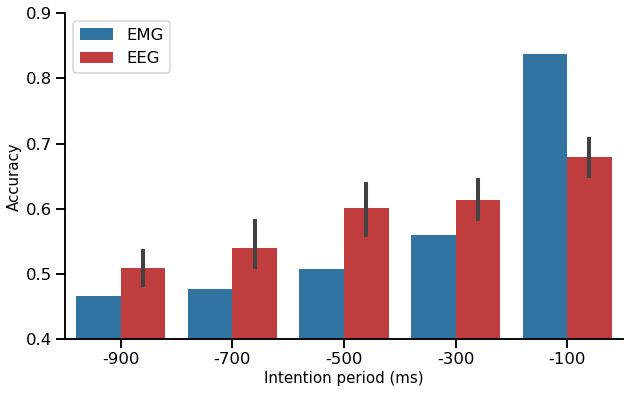

In [45]:
figure(figsize=(10,6))
sns.set_context('talk', rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})
sns.set_color_codes('pastel')
f= sns.barplot(x = 'Intention period', y='Accuracy', hue = 'Modality', data = fin, palette=['tab:blue', 'tab:red'])
f.set(xlabel='Intention period (ms)')
plt.ylim((0.4,0.9))
f.legend(loc='upper left')
sns.despine()

EEG-EMG

In [47]:
#EEG
path = "/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/"

data_reeg_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-eeg.csv')

data_lemg_1_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-emg.csv')
data_remg_1_11 = pd.concat([data_lemg_1_11.iloc[:,:3], data_lemg_1_11.iloc[:,3]-0.009, data_lemg_1_11.iloc[:,4] + 0.270], axis=1)
data_remg_1_11.rename(columns={'EMG1':'Deltoïd', 'EMG2':'Biceps'}, inplace=True )

data_eeg_1_11 = np.zeros((len(data_reeg_11)//5, data_reeg_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_eeg_1_11[50*i:50+50*i, :] = data_reeg_11.iloc[250*i:50+250*i, :]
    
data_eeg_1_11 = pd.DataFrame(data_eeg_1_11, columns=data_reeg_11.columns)

data_emg_1_11 = np.zeros((len(data_remg_1_11)//5, data_remg_1_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_emg_1_11[50*i:50+50*i, :] = data_remg_1_11.iloc[250*i:50+250*i, :]


data_emg_1_11 = pd.DataFrame(data_emg_1_11, columns=data_remg_1_11.columns)

# EEG Window 
win_eeg = 25
win_eeg_scaled_1_11 = np.arange(len(data_eeg_1_11))//win_eeg

# EMG Window 
win_emg = 50
win_emg_scaled_1_11 = np.arange(len(data_emg_1_11))//win_emg

#EMG DataFrame
feat_list = [rms, mini, maxi, mav, var]                                      
nfeat_list = ['rms', 'mini', 'maxi', 'mav', 'var']

muscle_1_11 =[None] * len(feat_list)
muscle_2_11 =[None] * len(feat_list)


for i in range(len(feat_list)):
    muscle_1_11[i] = data_emg_1_11.groupby(win_emg_scaled_1_11)['Biceps'].apply(feat_list[i])
    muscle_2_11[i] = data_emg_1_11.groupby(win_emg_scaled_1_11)['Deltoïd'].apply(feat_list[i])

m1_11 = pd.DataFrame(muscle_1_11, index=nfeat_list).transpose()
m2_11 = pd.DataFrame(muscle_2_11, index=nfeat_list).transpose()
mk_11 = {'Biceps':m1_11, 'Deltoïd':m2_11}
muscles_11 = pd.concat([m1_11,m2_11], axis=1, keys=mk_11.keys())

c_labels_11 = data_emg_1_11.iloc[:,:3].groupby(win_emg_scaled_1_11).mean()

win_emg_mean_1_11 = pd.concat([c_labels_11, muscles_11], axis=1)

#EEG DataFrames
win_eeg_mean_1_11 = data_eeg_1_11.groupby(win_eeg_scaled_1_11).mean() 
df_eeg_1_11 = win_eeg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_11.columns[3:].tolist())
df_eeg_1_11.reset_index(inplace=True)

#EMG
df_emg_1_11 = win_emg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_emg_mean_1_11.columns[3:].tolist())
df_emg_1_11.reset_index(inplace=True)

#EEG - EMG
df_eeg_emg = pd.concat([df_eeg_1_11, df_emg_1_11.iloc[:,2:]], axis=1)

In [50]:
X_eeg_emg = df_eeg_emg.iloc[:,2:].values
y_eeg_emg = np.asarray(df_eeg_emg['rp_class'])

clf_eeg_emg = LDA(solver='lsqr', shrinkage='auto')

clf_eeg_emg.fit(X_eeg_emg, y_eeg_emg)

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True) 

cv_results = cross_val_score(clf_eeg_emg, X_eeg_emg, y_eeg_emg, cv=kfolds)
cv_average = cv_results.mean()
st_deviation = cv_results.std()
print(cv_average)
print(st_deviation)
pred_y_eeg_emg = cross_val_predict(clf_eeg_emg, X_eeg_emg, y_eeg_emg, cv=kfolds)

0.537037037037037
0.07267191433462439


In [54]:
score_eeg_emg = np.zeros(5)
score_eeg_emg[0] = cv_average

In [56]:
#EEG
path = "/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/"

data_reeg_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-eeg.csv')

data_lemg_1_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-emg.csv')
data_remg_1_11 = pd.concat([data_lemg_1_11.iloc[:,:3], data_lemg_1_11.iloc[:,3]-0.009, data_lemg_1_11.iloc[:,4] + 0.270], axis=1)
data_remg_1_11.rename(columns={'EMG1':'Deltoïd', 'EMG2':'Biceps'}, inplace=True )

data_eeg_1_11 = np.zeros((len(data_reeg_11)//5, data_reeg_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_eeg_1_11[50*i:50+50*i, :] = data_reeg_11.iloc[50+250*i:100+250*i, :]
    
data_eeg_1_11 = pd.DataFrame(data_eeg_1_11, columns=data_reeg_11.columns)

data_emg_1_11 = np.zeros((len(data_remg_1_11)//5, data_remg_1_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_emg_1_11[50*i:50+50*i, :] = data_remg_1_11.iloc[50+250*i:100+250*i, :]


data_emg_1_11 = pd.DataFrame(data_emg_1_11, columns=data_remg_1_11.columns)

# EEG Window 
win_eeg = 25
win_eeg_scaled_1_11 = np.arange(len(data_eeg_1_11))//win_eeg

# EMG Window 
win_emg = 50
win_emg_scaled_1_11 = np.arange(len(data_emg_1_11))//win_emg

#EMG DataFrame
feat_list = [rms, mini, maxi, mav, var]                                      
nfeat_list = ['rms', 'mini', 'maxi', 'mav', 'var']

muscle_1_11 =[None] * len(feat_list)
muscle_2_11 =[None] * len(feat_list)


for i in range(len(feat_list)):
    muscle_1_11[i] = data_emg_1_11.groupby(win_emg_scaled_1_11)['Biceps'].apply(feat_list[i])
    muscle_2_11[i] = data_emg_1_11.groupby(win_emg_scaled_1_11)['Deltoïd'].apply(feat_list[i])

m1_11 = pd.DataFrame(muscle_1_11, index=nfeat_list).transpose()
m2_11 = pd.DataFrame(muscle_2_11, index=nfeat_list).transpose()
mk_11 = {'Biceps':m1_11, 'Deltoïd':m2_11}
muscles_11 = pd.concat([m1_11,m2_11], axis=1, keys=mk_11.keys())

c_labels_11 = data_emg_1_11.iloc[:,:3].groupby(win_emg_scaled_1_11).mean()

win_emg_mean_1_11 = pd.concat([c_labels_11, muscles_11], axis=1)

#EEG DataFrames
win_eeg_mean_1_11 = data_eeg_1_11.groupby(win_eeg_scaled_1_11).mean() 
df_eeg_1_11 = win_eeg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_11.columns[3:].tolist())
df_eeg_1_11.reset_index(inplace=True)

#EMG
df_emg_1_11 = win_emg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_emg_mean_1_11.columns[3:].tolist())
df_emg_1_11.reset_index(inplace=True)

#EEG - EMG
df_eeg_emg = pd.concat([df_eeg_1_11, df_emg_1_11.iloc[:,2:]], axis=1)

In [57]:
X_eeg_emg = df_eeg_emg.iloc[:,2:].values
y_eeg_emg = np.asarray(df_eeg_emg['rp_class'])

clf_eeg_emg = LDA(solver='lsqr', shrinkage='auto')

clf_eeg_emg.fit(X_eeg_emg, y_eeg_emg)

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True) 

cv_results = cross_val_score(clf_eeg_emg, X_eeg_emg, y_eeg_emg, cv=kfolds)
cv_average = cv_results.mean()
st_deviation = cv_results.std()
print(cv_average)
print(st_deviation)
pred_y_eeg_emg = cross_val_predict(clf_eeg_emg, X_eeg_emg, y_eeg_emg, cv=kfolds)

0.4666666666666667
0.062415924245750806


In [58]:
score_eeg_emg[1] = cv_average

In [59]:
score_eeg_emg

array([0.53703704, 0.46666667, 0.        , 0.        , 0.        ])

In [60]:
#EEG
path = "/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/"

data_reeg_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-eeg.csv')

data_lemg_1_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-emg.csv')
data_remg_1_11 = pd.concat([data_lemg_1_11.iloc[:,:3], data_lemg_1_11.iloc[:,3]-0.009, data_lemg_1_11.iloc[:,4] + 0.270], axis=1)
data_remg_1_11.rename(columns={'EMG1':'Deltoïd', 'EMG2':'Biceps'}, inplace=True )

data_eeg_1_11 = np.zeros((len(data_reeg_11)//5, data_reeg_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_eeg_1_11[50*i:50+50*i, :] = data_reeg_11.iloc[100+250*i:150+250*i, :]
    
data_eeg_1_11 = pd.DataFrame(data_eeg_1_11, columns=data_reeg_11.columns)

data_emg_1_11 = np.zeros((len(data_remg_1_11)//5, data_remg_1_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_emg_1_11[50*i:50+50*i, :] = data_remg_1_11.iloc[100+250*i:150+250*i, :]


data_emg_1_11 = pd.DataFrame(data_emg_1_11, columns=data_remg_1_11.columns)

# EEG Window 
win_eeg = 25
win_eeg_scaled_1_11 = np.arange(len(data_eeg_1_11))//win_eeg

# EMG Window 
win_emg = 50
win_emg_scaled_1_11 = np.arange(len(data_emg_1_11))//win_emg

#EMG DataFrame
feat_list = [rms, mini, maxi, mav, var]                                      
nfeat_list = ['rms', 'mini', 'maxi', 'mav', 'var']

muscle_1_11 =[None] * len(feat_list)
muscle_2_11 =[None] * len(feat_list)


for i in range(len(feat_list)):
    muscle_1_11[i] = data_emg_1_11.groupby(win_emg_scaled_1_11)['Biceps'].apply(feat_list[i])
    muscle_2_11[i] = data_emg_1_11.groupby(win_emg_scaled_1_11)['Deltoïd'].apply(feat_list[i])

m1_11 = pd.DataFrame(muscle_1_11, index=nfeat_list).transpose()
m2_11 = pd.DataFrame(muscle_2_11, index=nfeat_list).transpose()
mk_11 = {'Biceps':m1_11, 'Deltoïd':m2_11}
muscles_11 = pd.concat([m1_11,m2_11], axis=1, keys=mk_11.keys())

c_labels_11 = data_emg_1_11.iloc[:,:3].groupby(win_emg_scaled_1_11).mean()

win_emg_mean_1_11 = pd.concat([c_labels_11, muscles_11], axis=1)

#EEG DataFrames
win_eeg_mean_1_11 = data_eeg_1_11.groupby(win_eeg_scaled_1_11).mean() 
df_eeg_1_11 = win_eeg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_11.columns[3:].tolist())
df_eeg_1_11.reset_index(inplace=True)

#EMG
df_emg_1_11 = win_emg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_emg_mean_1_11.columns[3:].tolist())
df_emg_1_11.reset_index(inplace=True)

#EEG - EMG
df_eeg_emg = pd.concat([df_eeg_1_11, df_emg_1_11.iloc[:,2:]], axis=1)

In [61]:
X_eeg_emg = df_eeg_emg.iloc[:,2:].values
y_eeg_emg = np.asarray(df_eeg_emg['rp_class'])

clf_eeg_emg = LDA(solver='lsqr', shrinkage='auto')

clf_eeg_emg.fit(X_eeg_emg, y_eeg_emg)

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True) 

cv_results = cross_val_score(clf_eeg_emg, X_eeg_emg, y_eeg_emg, cv=kfolds)
cv_average = cv_results.mean()
st_deviation = cv_results.std()
print(cv_average)
print(st_deviation)
pred_y_eeg_emg = cross_val_predict(clf_eeg_emg, X_eeg_emg, y_eeg_emg, cv=kfolds)

0.5592592592592592
0.08834711438427083


In [62]:
score_eeg_emg[2] = cv_average

In [63]:
#EEG
path = "/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/"

data_reeg_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-eeg.csv')

data_lemg_1_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-emg.csv')
data_remg_1_11 = pd.concat([data_lemg_1_11.iloc[:,:3], data_lemg_1_11.iloc[:,3]-0.009, data_lemg_1_11.iloc[:,4] + 0.270], axis=1)
data_remg_1_11.rename(columns={'EMG1':'Deltoïd', 'EMG2':'Biceps'}, inplace=True )

data_eeg_1_11 = np.zeros((len(data_reeg_11)//5, data_reeg_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_eeg_1_11[50*i:50+50*i, :] = data_reeg_11.iloc[150+250*i:200+250*i, :]
    
data_eeg_1_11 = pd.DataFrame(data_eeg_1_11, columns=data_reeg_11.columns)

data_emg_1_11 = np.zeros((len(data_remg_1_11)//5, data_remg_1_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_emg_1_11[50*i:50+50*i, :] = data_remg_1_11.iloc[150+250*i:200+250*i, :]


data_emg_1_11 = pd.DataFrame(data_emg_1_11, columns=data_remg_1_11.columns)

# EEG Window 
win_eeg = 25
win_eeg_scaled_1_11 = np.arange(len(data_eeg_1_11))//win_eeg

# EMG Window 
win_emg = 50
win_emg_scaled_1_11 = np.arange(len(data_emg_1_11))//win_emg

#EMG DataFrame
feat_list = [rms, mini, maxi, mav, var]                                      
nfeat_list = ['rms', 'mini', 'maxi', 'mav', 'var']

muscle_1_11 =[None] * len(feat_list)
muscle_2_11 =[None] * len(feat_list)


for i in range(len(feat_list)):
    muscle_1_11[i] = data_emg_1_11.groupby(win_emg_scaled_1_11)['Biceps'].apply(feat_list[i])
    muscle_2_11[i] = data_emg_1_11.groupby(win_emg_scaled_1_11)['Deltoïd'].apply(feat_list[i])

m1_11 = pd.DataFrame(muscle_1_11, index=nfeat_list).transpose()
m2_11 = pd.DataFrame(muscle_2_11, index=nfeat_list).transpose()
mk_11 = {'Biceps':m1_11, 'Deltoïd':m2_11}
muscles_11 = pd.concat([m1_11,m2_11], axis=1, keys=mk_11.keys())

c_labels_11 = data_emg_1_11.iloc[:,:3].groupby(win_emg_scaled_1_11).mean()

win_emg_mean_1_11 = pd.concat([c_labels_11, muscles_11], axis=1)

#EEG DataFrames
win_eeg_mean_1_11 = data_eeg_1_11.groupby(win_eeg_scaled_1_11).mean() 
df_eeg_1_11 = win_eeg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_11.columns[3:].tolist())
df_eeg_1_11.reset_index(inplace=True)

#EMG
df_emg_1_11 = win_emg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_emg_mean_1_11.columns[3:].tolist())
df_emg_1_11.reset_index(inplace=True)

#EEG - EMG
df_eeg_emg = pd.concat([df_eeg_1_11, df_emg_1_11.iloc[:,2:]], axis=1)

In [64]:
X_eeg_emg = df_eeg_emg.iloc[:,2:].values
y_eeg_emg = np.asarray(df_eeg_emg['rp_class'])

clf_eeg_emg = LDA(solver='lsqr', shrinkage='auto')

clf_eeg_emg.fit(X_eeg_emg, y_eeg_emg)

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True) 

cv_results = cross_val_score(clf_eeg_emg, X_eeg_emg, y_eeg_emg, cv=kfolds)
cv_average = cv_results.mean()
st_deviation = cv_results.std()
print(cv_average)
print(st_deviation)
pred_y_eeg_emg = cross_val_predict(clf_eeg_emg, X_eeg_emg, y_eeg_emg, cv=kfolds)

0.5666666666666667
0.09944978949701892


In [65]:
score_eeg_emg[3] = cv_average

In [66]:
#EEG
path = "/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/"

data_reeg_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-eeg.csv')

data_lemg_1_11 = pd.read_csv(path+'11\data_s11_rp-win_-1-0_srate-250_modality-emg.csv')
data_remg_1_11 = pd.concat([data_lemg_1_11.iloc[:,:3], data_lemg_1_11.iloc[:,3]-0.009, data_lemg_1_11.iloc[:,4] + 0.270], axis=1)
data_remg_1_11.rename(columns={'EMG1':'Deltoïd', 'EMG2':'Biceps'}, inplace=True )

data_eeg_1_11 = np.zeros((len(data_reeg_11)//5, data_reeg_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_eeg_1_11[50*i:50+50*i, :] = data_reeg_11.iloc[200+250*i:250+250*i, :]
    
data_eeg_1_11 = pd.DataFrame(data_eeg_1_11, columns=data_reeg_11.columns)

data_emg_1_11 = np.zeros((len(data_remg_1_11)//5, data_remg_1_11.shape[1]))

for i in range(max(data_reeg_11['epoch_ix'])):
    data_emg_1_11[50*i:50+50*i, :] = data_remg_1_11.iloc[200+250*i:250+250*i, :]


data_emg_1_11 = pd.DataFrame(data_emg_1_11, columns=data_remg_1_11.columns)

# EEG Window 
win_eeg = 25
win_eeg_scaled_1_11 = np.arange(len(data_eeg_1_11))//win_eeg

# EMG Window 
win_emg = 50
win_emg_scaled_1_11 = np.arange(len(data_emg_1_11))//win_emg

#EMG DataFrame
feat_list = [rms, mini, maxi, mav, var]                                      
nfeat_list = ['rms', 'mini', 'maxi', 'mav', 'var']

muscle_1_11 =[None] * len(feat_list)
muscle_2_11 =[None] * len(feat_list)


for i in range(len(feat_list)):
    muscle_1_11[i] = data_emg_1_11.groupby(win_emg_scaled_1_11)['Biceps'].apply(feat_list[i])
    muscle_2_11[i] = data_emg_1_11.groupby(win_emg_scaled_1_11)['Deltoïd'].apply(feat_list[i])

m1_11 = pd.DataFrame(muscle_1_11, index=nfeat_list).transpose()
m2_11 = pd.DataFrame(muscle_2_11, index=nfeat_list).transpose()
mk_11 = {'Biceps':m1_11, 'Deltoïd':m2_11}
muscles_11 = pd.concat([m1_11,m2_11], axis=1, keys=mk_11.keys())

c_labels_11 = data_emg_1_11.iloc[:,:3].groupby(win_emg_scaled_1_11).mean()

win_emg_mean_1_11 = pd.concat([c_labels_11, muscles_11], axis=1)

#EEG DataFrames
win_eeg_mean_1_11 = data_eeg_1_11.groupby(win_eeg_scaled_1_11).mean() 
df_eeg_1_11 = win_eeg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_eeg_mean_1_11.columns[3:].tolist())
df_eeg_1_11.reset_index(inplace=True)

#EMG
df_emg_1_11 = win_emg_mean_1_11.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_emg_mean_1_11.columns[3:].tolist())
df_emg_1_11.reset_index(inplace=True)

#EEG - EMG
df_eeg_emg = pd.concat([df_eeg_1_11, df_emg_1_11.iloc[:,2:]], axis=1)

In [67]:
X_eeg_emg = df_eeg_emg.iloc[:,2:].values
y_eeg_emg = np.asarray(df_eeg_emg['rp_class'])

clf_eeg_emg = LDA(solver='lsqr', shrinkage='auto')

clf_eeg_emg.fit(X_eeg_emg, y_eeg_emg)

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True) 

cv_results = cross_val_score(clf_eeg_emg, X_eeg_emg, y_eeg_emg, cv=kfolds)
cv_average = cv_results.mean()
st_deviation = cv_results.std()
print(cv_average)
print(st_deviation)
pred_y_eeg_emg = cross_val_predict(clf_eeg_emg, X_eeg_emg, y_eeg_emg, cv=kfolds)

0.8592592592592594
0.05689737591013783


In [68]:
score_eeg_emg[4] = cv_average

In [69]:
score_eeg_emg

array([0.53703704, 0.46666667, 0.55925926, 0.56666667, 0.85925926])

In [70]:
fin

,Modality,Intention period,Accuracy
0,EMG,-900,0.466667
1,EEG,-900,0.529630
2,EEG,-900,0.542365
3,EEG,-900,0.546237
4,EEG,-900,0.493763
5,EEG,-900,0.458621
6,EEG,-900,0.488403
7,EMG,-700,0.477778
8,EEG,-700,0.474074
9,EEG,-700,0.538670


In [107]:
Mod = pd.DataFrame(['EMG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG', 'EEG-EMG']*5, columns=['Modality'])
Int = pd.DataFrame(np.repeat(['-900', '-700','-500','-300','-100'], 8).tolist(), columns=['Intention period'])
Acc_2 = pd.DataFrame(acc, columns=['Accuracy'])

In [87]:
Accuracies

array([0.46666667, 0.52962963, 0.54236453, 0.54623656, 0.49376344,
       0.45862069, 0.48840336, 0.47777778, 0.47407407, 0.53866995,
       0.6216129 , 0.53870968, 0.54482759, 0.52537815, 0.50740741,
       0.51851852, 0.58362069, 0.66462366, 0.57752688, 0.61034483,
       0.64882353, 0.55925926, 0.56296296, 0.62118227, 0.64516129,
       0.55827957, 0.64137931, 0.65478992, 0.83703704, 0.66666667,
       0.66810345, 0.72408602, 0.61354839, 0.67586207, 0.72672269])

In [104]:
acc = np.zeros((8*5))
acc[0:7] = Accuracies[0:7]
acc[7] = score_eeg_emg[0]

acc[8:15] = Accuracies[7:14]
acc[15] = score_eeg_emg[1]

acc[16:23] = Accuracies[14:21]
acc[23] = score_eeg_emg[2]

acc[24:31] = Accuracies[21:28]
acc[31] = score_eeg_emg[2]

acc[32:39] = Accuracies[28:35]
acc[39] = score_eeg_emg[4]

In [105]:
acc

array([0.46666667, 0.52962963, 0.54236453, 0.54623656, 0.49376344,
       0.45862069, 0.48840336, 0.53703704, 0.47777778, 0.47407407,
       0.53866995, 0.6216129 , 0.53870968, 0.54482759, 0.52537815,
       0.46666667, 0.50740741, 0.51851852, 0.58362069, 0.66462366,
       0.57752688, 0.61034483, 0.64882353, 0.55925926, 0.55925926,
       0.56296296, 0.62118227, 0.64516129, 0.55827957, 0.64137931,
       0.65478992, 0.55925926, 0.83703704, 0.66666667, 0.66810345,
       0.72408602, 0.61354839, 0.67586207, 0.72672269, 0.85925926])

In [112]:
fin_2 = pd.concat([Mod, Int, Acc_2], axis=1)

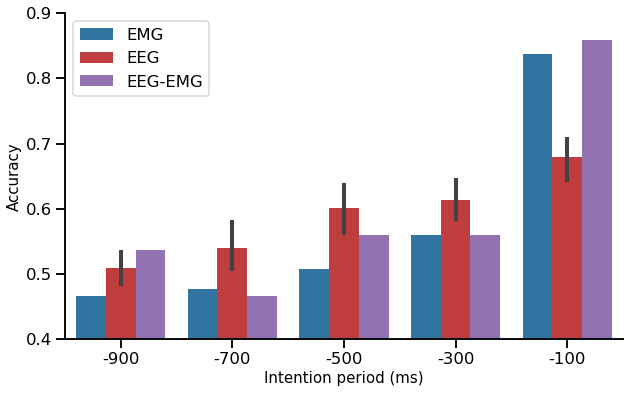

In [114]:
figure(figsize=(10,6))
sns.set_context('talk', rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})
sns.set_color_codes('pastel')
f= sns.barplot(x = 'Intention period', y='Accuracy', hue = 'Modality', data = fin_2, palette=['tab:blue', 'tab:red', 'tab:purple'])
f.set(xlabel='Intention period (ms)')
plt.ylim((0.4,0.9))
f.legend(loc='upper left')
sns.despine()